In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [28]:
covid=pd.read_csv("aggregate_covid_country.csv")

In [29]:
covid.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [30]:
covid

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [31]:
covid.shape

(23688, 5)

In [32]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [33]:
covid.drop(['Date', 'Country',], axis=1, inplace=True)

In [34]:
covid.head()

,Confirmed,Recovered,Deaths
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [35]:
covid.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [36]:
covid.isnull().sum()

Confirmed    0
Recovered    0
Deaths       0
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

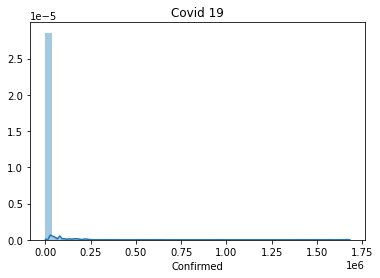

In [37]:
sns.distplot(covid["Confirmed"])
plt.title("Covid 19")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

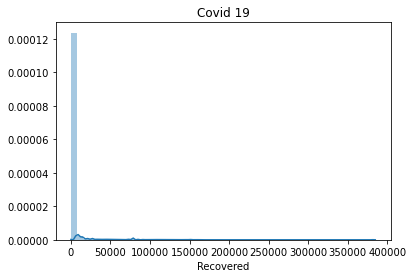

In [38]:
sns.distplot(covid["Recovered"])
plt.title("Covid 19")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

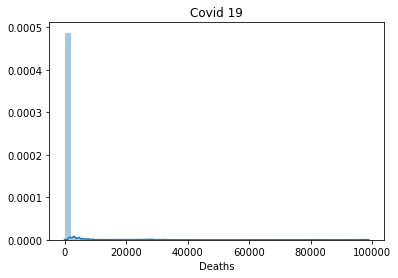

In [39]:
sns.distplot(covid["Deaths"])
plt.title("Covid 19")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

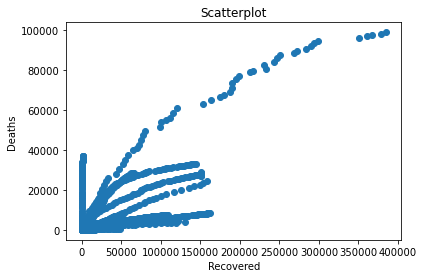

In [40]:
plt.scatter(covid["Recovered"],covid["Deaths"])
plt.title("Scatterplot")
plt.xlabel("Recovered")
plt.ylabel("Deaths")
plt.show

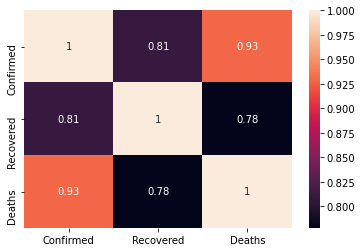

In [41]:
corr=covid.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(covid))
threshold=3
new_covid=covid[(z<3).all(axis=1)]

In [43]:
print("Original shape=",covid.shape,"\nNew shape=",new_covid.shape)

Original shape= (23688, 3) 
New shape= (23177, 3)


In [44]:
new_covid.skew()

Confirmed    6.906829
Recovered    7.472281
Deaths       9.729360
dtype: float64

In [45]:
x=new_covid.drop("Deaths",axis=1)
y=new_covid["Deaths"]

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX=sc.fit_transform(x)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [48]:
best_r_state = 0
for i in range (30,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state = i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    mod.score(x_train,y_train)
    tempaccu = r2_score(y_test,pred)
    if tempaccu > accu:
        accu = tempaccu
        best_r_state = i
    
    
print(f"For accuracy is {accu * 100}% best random state is {best_r_state}")

For accuracy is 63.2302454402264% best random state is 80


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=80)

In [51]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [52]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(classification_report(y_test,predlr))

C:\Users\SANDY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5081967213114754
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      3236
           1       0.00      0.00      0.00       315
           2       0.00      0.00      0.00       156
           3       0.00      0.00      0.00       126
           4       0.00      0.00      0.00        91
           5       0.00      0.00      0.00        71
           6       0.00      0.00      0.00        68
           7       0.00      0.00      0.00        60
           8       0.00      0.00      0.00        65
           9       0.00      0.00      0.00        56
          10       0.07      0.22      0.11        88
          11       0.00      0.00      0.00        41
          12       0.02      0.10      0.03        40
          13       0.00      0.00      0.00        28
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        23
        

C:\Users\SANDY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SANDY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.5540983606557377
[[3119   65   43 ...    0    0    0]
 [ 262   26   17 ...    0    0    0]
 [  89   37   15 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      3236
           1       0.08      0.08      0.08       315
           2       0.07      0.10      0.08       156
           3       0.10      0.07      0.08       126
           4       0.00      0.00      0.00        91
           5       0.00      0.00      0.00        71
           6       0.05      0.13      0.07        68
           7       0.03      0.08      0.05        60
           8       0.00      0.00      0.00        65
           9       0.04      0.09      0.05        56
          10       0.06      0.16      0.08        88
          11       0.00      0.00      0.00        41
          12       0.00      0.00      0.00       

C:\Users\SANDY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SANDY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.563244176013805
[[3236    0    0 ...    0    0    0]
 [ 315    0    0 ...    0    0    0]
 [ 156    0    0 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
              precision    recall  f1-score   support

           0       0.69      1.00      0.81      3236
           1       0.00      0.00      0.00       315
           2       0.00      0.00      0.00       156
           3       0.00      0.00      0.00       126
           4       0.00      0.00      0.00        91
           5       0.00      0.00      0.00        71
           6       0.17      0.03      0.05        68
           7       0.03      0.05      0.03        60
           8       0.00      0.00      0.00        65
           9       0.00      0.00      0.00        56
          10       0.03      0.18      0.06        88
          11       0.00      0.00      0.00        41
          12       0.05      0.10      0.06        

C:\Users\SANDY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SANDY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.6440034512510785
[[3090   50   21 ...    0    0    0]
 [ 127  141    6 ...    0    0    0]
 [  56   11   41 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3236
           1       0.57      0.45      0.50       315
           2       0.40      0.26      0.32       156
           3       0.46      0.44      0.45       126
           4       0.33      0.25      0.29        91
           5       0.27      0.28      0.28        71
           6       0.33      0.38      0.35        68
           7       0.25      0.35      0.29        60
           8       0.39      0.43      0.41        65
           9       0.33      0.38      0.35        56
          10       0.54      0.49      0.51        88
          11       0.38      0.37      0.37        41
          12       0.28      0.28      0.28       

C:\Users\SANDY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SANDY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.6163934426229508
[[3117   50   22 ...    0    0    0]
 [ 158  118    9 ...    0    0    0]
 [  73   18   31 ...    0    0    0]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3236
           1       0.45      0.37      0.41       315
           2       0.21      0.20      0.20       156
           3       0.32      0.33      0.32       126
           4       0.27      0.21      0.24        91
           5       0.17      0.14      0.16        71
           6       0.19      0.34      0.25        68
           7       0.14      0.22      0.17        60
           8       0.26      0.28      0.27        65
           9       0.27      0.30      0.29        56
          10       0.36      0.35      0.36        88
          11       0.27      0.29      0.28        41
          12       0.18      0.23      0.20       

C:\Users\SANDY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SANDY\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best model with 64 % accuracy is Decision tree classifier

In [60]:
import joblib
joblib.dump(dt,'Covid19.pkl')

['Covid19.pkl']

In [61]:
sk2 =joblib.load('Covid19.pkl')

In [62]:
sk2

DecisionTreeClassifier()